![dssg_banner](assets/dssg_banner.png)

In [1]:
# Import the data generation functions
from data_pipeline.rplan_content_extraction.rplan_utils import extract_text_and_save_to_txt_files
from data_pipeline.rplan_content_extraction.rplan_content_extractor import parse_rplan_directory
from data_pipeline.rplan_content_extraction.rplan_utils import parse_result_df

# Import the keyword search functions
from data_pipeline.rplan_content_extraction.rplan_keyword_search import negate_keyword_search, rplan_exact_keyword_search
# Import the visualization function
from visualizations.rplan_visualization import plot_keyword_search_results

# Import the paths to the keyword dictionaries and the content data
from data_pipeline.rplan_content_extraction.rplan_keyword_search import rplan_negate_keyword_dict_path

# Keyword Negation
This notebook gives an overview how to use the negation keyword search to remove false positives from the results of a keyword search. To illustrate, the keyword search of `2_8_regional_plans_demo` is first repeated (Step 1 & 2) and then extended (Step 3-5).

In [2]:
# Set the paths to the PDF and TXT directories
RPLAN_PDF_DIR = "../data/nrw/rplan/raw/pdfs"
RPLAN_TXT_DIR = "../data/nrw/rplan/raw/text"
RPLAN_OUTPUT_PATH = "../data/nrw/rplan/features/rplan_content.json"

## Step 1: Generate content

In [3]:
extract_text_and_save_to_txt_files(pdf_dir_path=RPLAN_PDF_DIR,
                                   txt_dir_path=RPLAN_TXT_DIR)

input_df = parse_rplan_directory(txt_dir_path=RPLAN_TXT_DIR,
                                 json_output_path=RPLAN_OUTPUT_PATH)

input_df = parse_result_df(df=input_df)

# save df as JSON
input_df.to_json(RPLAN_OUTPUT_PATH)

2023-09-21 14:47:24.002 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: arnsberg-2001-bochum_hagen.pdf
2023-09-21 14:47:25.241 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: arnsberg-2004-dortmund_unna_hamm.pdf
2023-09-21 14:47:27.248 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: arnsberg-2008-siegen.pdf
2023-09-21 14:47:27.738 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: arnsberg-2012-kreis_soest_hochsauerlandkreis.pdf
2023-09-21 14:47:28.388 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: bielefeld-_.pdf
2023-09-21 14:47:28.676 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scraper:pdf_parser_from_folder:63 - Parsing file: detmold-2007-paderborn_hoexter.pdf
2023-09-21 14:47:29.524 | INFO     | data_pipeline.pdf_scraper.tika_pdf_scr

## Step 2: Exact keyword search

Now we perform an exact keyword search on the data and plot the results.

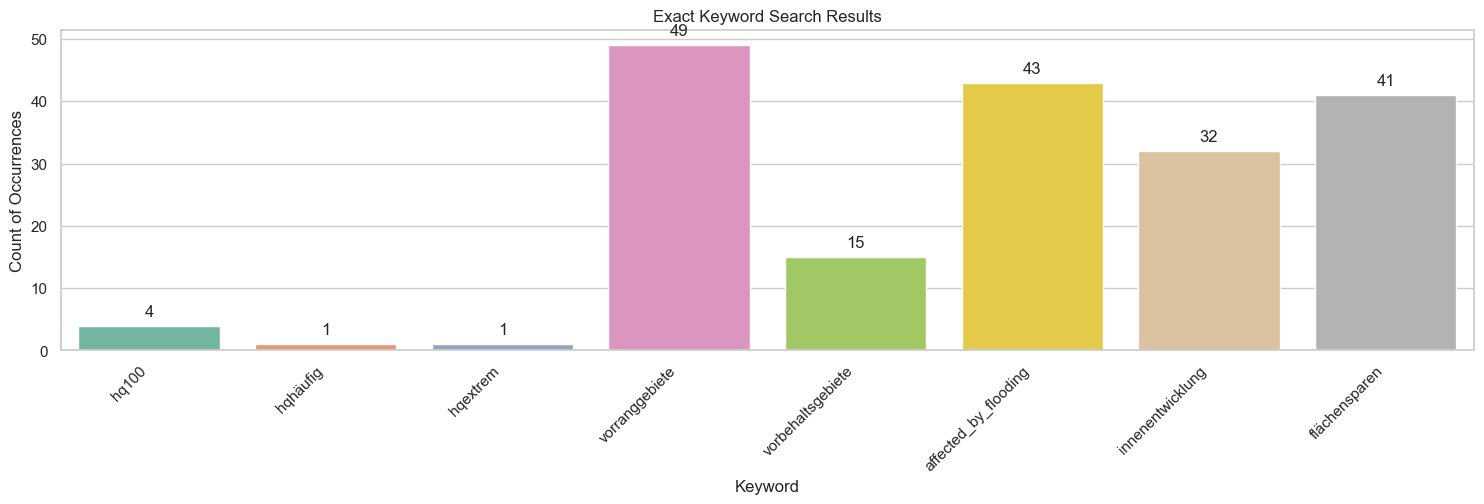

In [4]:
exact_result, exact_keywords = rplan_exact_keyword_search(input_df=input_df)

plot_keyword_search_results(result_df=exact_result,
                            keyword_columns=exact_keywords,
                            title="Exact Keyword Search Results")

## Step 3: Negate keyword search

Now we want to compare the results of the exact keyword search with the results of the negate keyword search. So first we remove the negation keywords from the content data.
Then we do another exact keyword search on the data without the negation keywords.

The negation keywords are defined in the file at `rplan_negate_keyword_dict_path`. The file contains a list with the following structure:

        `['naturschutz', 'natur', 'umwelt', 'umweltschutz']`

This is an exemplary usage, to remove keywords containing the topic `"naturschutz"` from the content data.

In [5]:
input_df = negate_keyword_search(input_df=input_df,
                                 negate_keyword_dict_path=rplan_negate_keyword_dict_path)

2023-09-21 14:48:02.687 | INFO     | data_pipeline.rplan_content_extraction.rplan_keyword_search:negate_keyword_search:135 - Negate keywords: ['naturschutz', 'natur', 'umwelt', 'umweltschutz']
2023-09-21 14:48:03.664 | INFO     | data_pipeline.rplan_content_extraction.rplan_keyword_search:negate_keyword_search:143 - Removed 614 rows with negate keywords


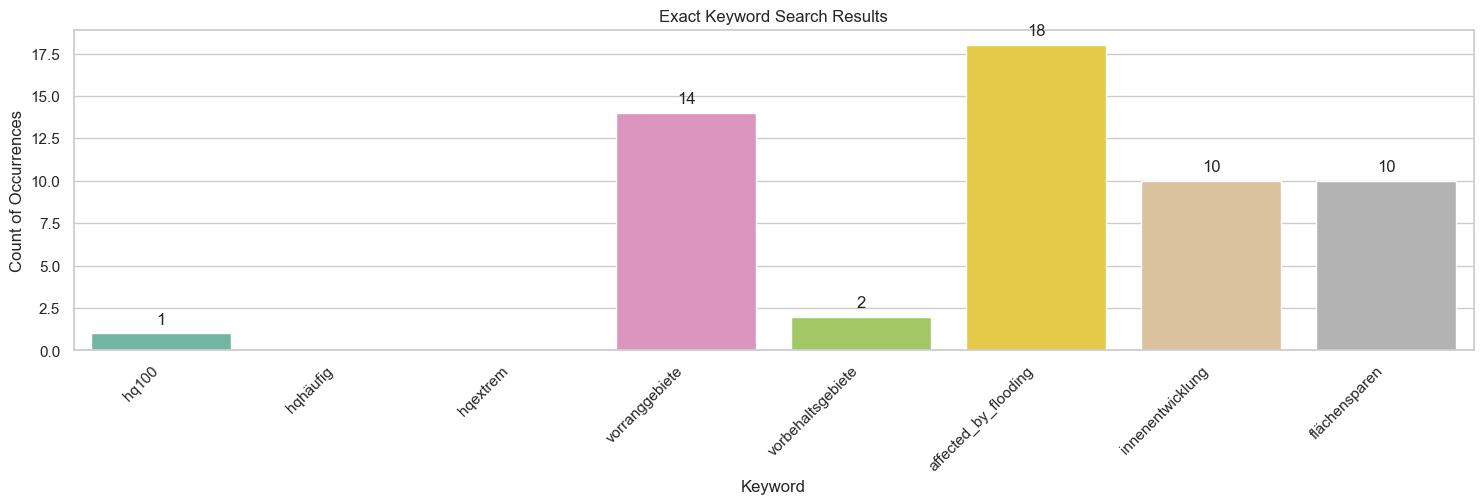

In [6]:
exact_result, exact_keywords = rplan_exact_keyword_search(input_df=input_df)

plot_keyword_search_results(result_df=exact_result,
                            keyword_columns=exact_keywords,
                            title="Exact Keyword Search Results")

## Step 4: Compare the results
We see that the number of matches for has decreased. For instance, the number of matches for the keyword "Vorranggebiet" has decreased from 55 to 18.

## Step 5: Fuzzy Keyword Search

Now we want to perform a fuzzy keyword search on the data. We can use the results of the negate keyword search as input for the fuzzy keyword search.

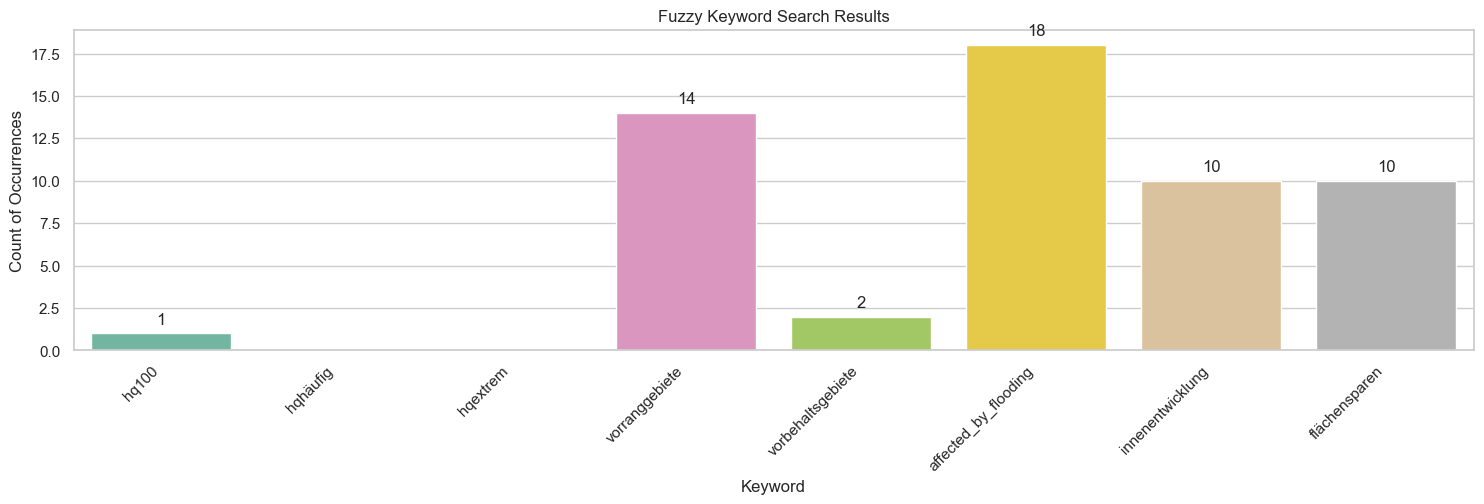

In [7]:
fuzzy_result, fuzzy_keywords = rplan_exact_keyword_search(input_df=input_df)

plot_keyword_search_results(result_df=fuzzy_result,
                            keyword_columns=fuzzy_keywords,
                            title="Fuzzy Keyword Search Results")